# Loading and Testing Data

In [1]:
##########################################################################
##########################################################################
#This file is designed to plot animation of all 17 clusters using the file total_data_all_clusters_all_snapshots.pkl that contains tracked data of all clusters

from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import os
import pickle
import matplotlib
import matplotlib.colors as colors
from matplotlib import rc #to use Latex math symbols like 'phi'
import astropy
from astropy.io import ascii
import astropy
from astropy.io import ascii
import matplotlib
import pdb
from importlib import reload

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rc('text', usetex=False)
#############################################################################
#constants
#############################################################################

MsunToGm = 1.99e33
KpcToCm = 3.086e21
mp = 1.67e-24
#bin_edge = 10.
bin_edge = 30.

bins = np.arange(-25,25,0.1)

############################################################################
#read in sim files and find relevant particles
############################################################################
#STAMPEDE
simname = 'm12i_res7100_mhdcv'
simtype="fire2"
snap_initial=596 #this is the snapshot at which the clusters were taken from using the fof algorithm I am using this to extract information from the snapshot where the clusters were first seen
snap_later=689
datapath="./" #this is teh path where the data of our tracked clusters is


plot_path="./histograms/" #creating a path to store the plots only if it does not exist
if not os.path.exists(plot_path):
  os.makedirs(plot_path)



fn_clusters_initial="chem_clusters_at_snapshot_"+str(snap_initial)+".pkl" 
fn_clusters_later="chem_clusters_at_snapshot_"+str(snap_later)+".pkl" 

with open(datapath+fn_clusters_initial, "rb") as input:
    cluster_data_initial = pickle.load(input)
    
with open(datapath+fn_clusters_later, "rb") as input:
    cluster_data_later = pickle.load(input)

#print("########################## TEST: This is cluster data from second cluster",cluster_data[1])
print("####################### Total clusters present is",cluster_data_initial[1].keys())

colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue','blueviolet','darkgreen'] #19 colors
#colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue'] #17 colors
#colors=['cyan','blue','green','magenta','yellow','teal','brown','tan','lime','red'] #10 colors

#total_clusters=10 #just in case you want to change the no. of clusters. Setting 10 means select the first 10
############################
############################

####################### Total clusters present is dict_keys(['ind_tracked', 'age_tracked', 'x_tracked', 'y_tracked', 'z_tracked', 'vx_tracked', 'vy_tracked', 'vz_tracked', 'mass_tracked', 'xcm', 'ycm', 'zcm', 'delta_rxyz', 'rmax', 'ymax', 'ymin', 'xmax', 'xmin', 'avg_delta_rxyz', 'vR_cyl_tracked', 'vphi_cyl_tracked', 'vz_cyl_tracked', 'feh_tracked', 'mgh_tracked'])


# Mean Fe/H vs distance to CM of clusters from Galactic Center of individual clusters before and after 


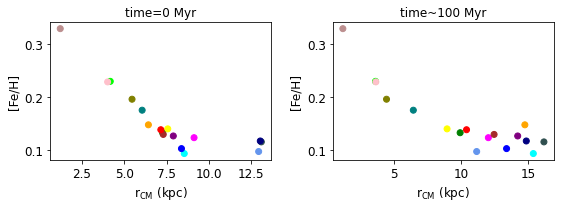

In [2]:
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']   
cluster_count=0

fig1=plt.figure()
fig1.set_size_inches(8,3)
ax2=fig1.add_subplot(121)
ax1=fig1.add_subplot(122)
plot_name="feh_vs_radius"+simname+"_cluster_"+str(cluster_count+1)

mean_feh=np.zeros(len(cluster_data_initial))
mean_mgh=np.zeros(len(cluster_data_initial))
r_cm_initial=np.zeros(len(cluster_data_initial))
r_cm_later=np.zeros(len(cluster_data_later))

for i in range(len(cluster_data_initial)):                              
    
    feh_l=cluster_data_later[cluster_count+1]["feh_tracked"]
    mgh_l=cluster_data_later[cluster_count+1]["mgh_tracked"]
    mean_feh[i]=np.mean(feh_l)
    mean_mgh[i]=np.mean(mgh_l)
    
    xcm_initial=cluster_data_initial[cluster_count+1]["xcm"]
    ycm_initial=cluster_data_initial[cluster_count+1]["ycm"]
    zcm_initial=cluster_data_initial[cluster_count+1]["zcm"]
    
    xcm_later=cluster_data_later[cluster_count+1]["xcm"]
    ycm_later=cluster_data_later[cluster_count+1]["ycm"]
    zcm_later=cluster_data_later[cluster_count+1]["zcm"]
    
    r_cm_initial[i]=(xcm_initial**2+ycm_initial**2+zcm_initial**2)**(0.5)
    r_cm_later[i]=(xcm_later**2+ycm_later**2+zcm_later**2)**(0.5)
    

    cluster_count+=1

ax2.scatter(r_cm_initial,mean_feh,c=colors)
ax2.set_xlabel(r"r$_{\rm CM}$ (kpc)",fontsize=12)
ax2.set_ylabel("[Fe/H]",fontsize=12)  
ax2.set_title("time=0 Myr")

    
ax1.scatter(r_cm_later,mean_feh,c=colors)    
ax1.set_xlabel(r"r$_{\rm CM}$ (kpc)",fontsize=12)
ax1.set_ylabel("[Fe/H]",fontsize=12)  
ax1.set_title("time~100 Myr")

plt.tight_layout()   
fig1.savefig("Average_Metallicity_with_Radius.png")
plt.show()

# [Fe/H] and [Mg/H\] over the delta r_xy (ie. the difference of the distance to the CM of the cluster from the galactic center)

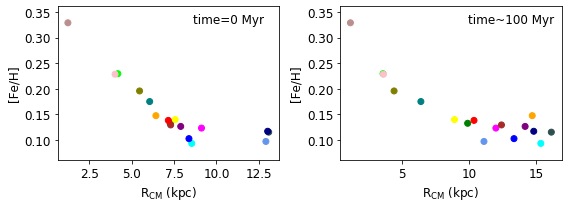

In [67]:
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']   
cluster_count=0

fig1=plt.figure()
fig1.set_size_inches(8,3)
ax2=fig1.add_subplot(121)
ax1=fig1.add_subplot(122)
plot_name="feh_vs_radius"+simname+"_cluster_"+str(cluster_count+1)

mean_feh=np.zeros(len(cluster_data_initial))
mean_mgh=np.zeros(len(cluster_data_initial))
R_cm_initial=np.zeros(len(cluster_data_initial))
R_cm_later=np.zeros(len(cluster_data_later))

for i in range(len(cluster_data_initial)):                              
    
    feh_l=cluster_data_later[cluster_count+1]["feh_tracked"]
    mgh_l=cluster_data_later[cluster_count+1]["mgh_tracked"]
    mean_feh[i]=np.mean(feh_l)
    mean_mgh[i]=np.mean(mgh_l)
    
    xcm_initial=cluster_data_initial[cluster_count+1]["xcm"]
    ycm_initial=cluster_data_initial[cluster_count+1]["ycm"]
    zcm_initial=cluster_data_initial[cluster_count+1]["zcm"]
    
    xcm_later=cluster_data_later[cluster_count+1]["xcm"]
    ycm_later=cluster_data_later[cluster_count+1]["ycm"]
    zcm_later=cluster_data_later[cluster_count+1]["zcm"]
    
    R_cm_initial[i]=(xcm_initial**2+ycm_initial**2)**(0.5)
    R_cm_later[i]=(xcm_later**2+ycm_later**2)**(0.5)
    

    cluster_count+=1

ax2.scatter(R_cm_initial,mean_feh,c=colors)
ax2.set_xlabel(r"R$_{\rm CM}$ (kpc)",fontsize=12)
ax2.set_ylabel("[Fe/H]",fontsize=12)  
ax2.set_title("time=0 Myr",x=0.77,y=0.98, pad=-14)

    
ax1.scatter(R_cm_later,mean_feh,c=colors)    
ax1.set_xlabel(r"R$_{\rm CM}$ (kpc)",fontsize=12)
ax1.set_ylabel("[Fe/H]",fontsize=12)  
ax1.set_title("time~100 Myr",x=0.77,y=0.98, pad=-14)

plt.tight_layout()   
fig1.savefig("Average_Metallicity_with_Radius_cylindrical.png",dpi=200)
plt.show()

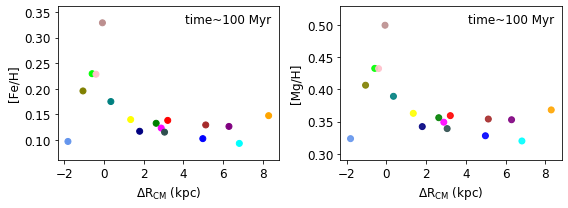

In [66]:
from matplotlib import rc
matplotlib.rc('text', usetex=False)
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']   
cluster_count=0

fig1=plt.figure()
fig1.set_size_inches(8,3)
ax2=fig1.add_subplot(121)
ax1=fig1.add_subplot(122)
plot_name="feh_vs_radius"+simname+"_cluster_"+str(cluster_count+1)

mean_feh=np.zeros(len(cluster_data_initial))
mean_mgh=np.zeros(len(cluster_data_initial))

delta_R_cm=np.zeros(len(cluster_data_initial))
R_cm_initial=np.zeros(len(cluster_data_initial))
R_cm_later=np.zeros(len(cluster_data_initial))
for i in range(len(cluster_data_initial)):                              
    
    feh_l=cluster_data_later[cluster_count+1]["feh_tracked"]
    mgh_l=cluster_data_later[cluster_count+1]["mgh_tracked"]
    mean_feh[i]=np.mean(feh_l)
    mean_mgh[i]=np.mean(mgh_l)
    
    xcm_initial=cluster_data_initial[cluster_count+1]["xcm"]
    ycm_initial=cluster_data_initial[cluster_count+1]["ycm"]
    zcm_initial=cluster_data_initial[cluster_count+1]["zcm"]
    
    xcm_later=cluster_data_later[cluster_count+1]["xcm"]
    ycm_later=cluster_data_later[cluster_count+1]["ycm"]
    zcm_later=cluster_data_later[cluster_count+1]["zcm"]
    
    R_cm_initial[i]=((xcm_initial)**2+(ycm_initial)**2)**(0.5)
    R_cm_later[i]=((xcm_later)**2+(ycm_later)**2)**(0.5)
    
    #delta_R_cm[i]=((xcm_initial-xcm_later)**2+(ycm_initial-ycm_later)**2+())**(0.5)
    delta_R_cm[i]=R_cm_later[i]-R_cm_initial[i]

    cluster_count+=1

ax2.scatter(delta_R_cm,mean_feh,c=colors)
ax2.set_xlabel(r"$\rm{\Delta}R_{CM}$ (kpc)",fontsize=12) #\rm prevents the italicizing of the subscript :)
ax2.set_ylabel("[Fe/H]",fontsize=12)  
ax2.set_title("time~100 Myr",x=0.77,y=0.98, pad=-14)

    
ax1.scatter(delta_R_cm,mean_mgh,c=colors,alpha=0.9)    
ax1.set_xlabel(r"$\rm{\Delta}R_{CM}$ (kpc)",fontsize=12)
ax1.set_ylabel("[Mg/H]",fontsize=12)  
ax1.set_title("time~100 Myr",x=0.77,y=0.98, pad=-14)

plt.tight_layout()   
fig1.savefig("Average_Metallicity_with_delta_R_CM.png",dpi=200)
plt.show()

# Mean Mg/H of individual clusters before and after

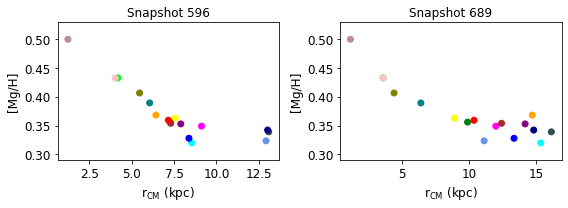

In [39]:
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']   
cluster_count=0

fig1=plt.figure()
fig1.set_size_inches(8,3)
ax2=fig1.add_subplot(121)
ax1=fig1.add_subplot(122)
plot_name="feh_vs_radius"+simname+"_cluster_"+str(cluster_count+1)

mean_feh=np.zeros(len(cluster_data_initial))
mean_mgh=np.zeros(len(cluster_data_initial))
r_cm_initial=np.zeros(len(cluster_data_initial))
r_cm_later=np.zeros(len(cluster_data_later))

for i in range(len(cluster_data_initial)):                              
    
    feh_l=cluster_data_later[cluster_count+1]["feh_tracked"]
    mgh_l=cluster_data_later[cluster_count+1]["mgh_tracked"]
    mean_feh[i]=np.mean(feh_l)
    mean_mgh[i]=np.mean(mgh_l)
    
    xcm_initial=cluster_data_initial[cluster_count+1]["xcm"]
    ycm_initial=cluster_data_initial[cluster_count+1]["ycm"]
    zcm_initial=cluster_data_initial[cluster_count+1]["zcm"]
    
    xcm_later=cluster_data_later[cluster_count+1]["xcm"]
    ycm_later=cluster_data_later[cluster_count+1]["ycm"]
    zcm_later=cluster_data_later[cluster_count+1]["zcm"]
    
    r_cm_initial[i]=(xcm_initial**2+ycm_initial**2+zcm_initial**2)**(0.5)
    r_cm_later[i]=(xcm_later**2+ycm_later**2+zcm_later**2)**(0.5)
    
    cluster_count+=1

ax2.scatter(r_cm_initial,mean_mgh,c=colors)
ax2.set_xlabel(r"r$_{\rm CM}$ (kpc)",fontsize=12)
ax2.set_ylabel("[Mg/H]",fontsize=12)  
ax2.set_title("Snapshot 596")

    
ax1.scatter(r_cm_later,mean_mgh,c=colors)    
ax1.set_xlabel(r"r$_{\rm CM}$ (kpc)",fontsize=12)
ax1.set_ylabel("[Mg/H]",fontsize=12)  
ax1.set_title("Snapshot 689")

plt.tight_layout()   
fig1.savefig("Average_MgH_with_Radius.png")
plt.show()

# Metallicity Histogram of Stars in all clusters


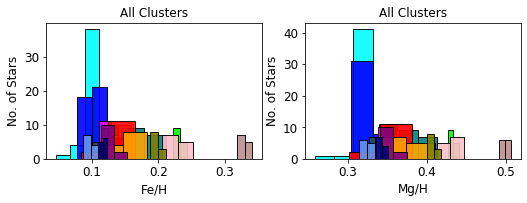

In [98]:
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']   
cluster_count=0
fig1=plt.figure()
fig1.set_size_inches(8.5,2.5)
ax1=fig1.add_subplot(121)
ax2=fig1.add_subplot(122)
for i in range(len(cluster_data_initial)):                              
    
    #ax1=fig1.add_subplot(212)
    
    feh_i=cluster_data_initial[cluster_count+1]["feh_tracked"]
    mgh_i=cluster_data_initial[cluster_count+1]["mgh_tracked"]
    
    feh_l=cluster_data_later[cluster_count+1]["feh_tracked"]
    mgh_l=cluster_data_later[cluster_count+1]["mgh_tracked"]
    
    plot_name="feh_histogram"+simname+"_cluster_"+str(cluster_count+1)
    n,bins,edges=ax1.hist(feh_i,bins=int(len(feh_i)**(1/3)),color=colors[i],ec="black",alpha=0.9)
    ax1.set_xlabel("Fe/H",fontsize=12)
    ax1.set_ylabel("No. of Stars",fontsize=12)  
    ax1.set_title("All Clusters")
    #ax1.set_xticks(bins)
    
    n,bins,edges=ax2.hist(mgh_i,bins=int(len(feh_i)**(1/3)),color=colors[i],ec="black",alpha=0.9)
    ax2.set_xlabel("Mg/H",fontsize=12)
    ax2.set_ylabel("No. of Stars",fontsize=12)  
    ax2.set_title("All Clusters")
    
    #fig1.savefig(plot_path+plot_name+".png",bbox_inches='tight',dpi=200)
    
    #plt.tight_layout()
    #fig1.clf()
    #break
    cluster_count+=1
plt.show()

# Fe/H Scatter Plot each clusters

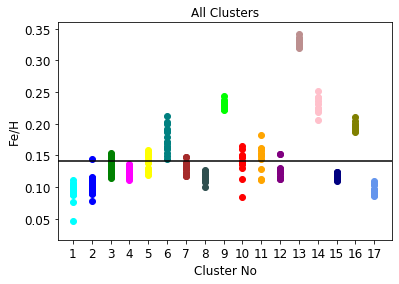

In [31]:
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']   
cluster_count=0
fig1=plt.figure()
#fig1.set_size_inches(7,5)
ax2=fig1.add_subplot(111)
all_fe=list()
for i in range(len(cluster_data_initial)):                              
    #ax1=fig1.add_subplot(212)
    feh_i=cluster_data_initial[cluster_count+1]["feh_tracked"]
    mgh_i=cluster_data_initial[cluster_count+1]["mgh_tracked"]
    
    feh_l=cluster_data_later[cluster_count+1]["feh_tracked"]
    mgh_l=cluster_data_later[cluster_count+1]["mgh_tracked"]
    list.extend(all_fe,list(feh_i))
    plot_name="feh_scatter"+simname+"_cluster_"+str(cluster_count+1)
    x_values=np.ones(len(feh_i))*(cluster_count+1)
    ax2.scatter(x_values,feh_i,color=colors[i],label="cluster "+str(cluster_count+1))
    #ax2.axhline(y=average,c=colors[i])
    ax2.set_xlabel("Cluster No",fontsize=12)
    ax2.set_ylabel("Fe/H",fontsize=12)  
    ax2.set_title("All Clusters")
    ax2.set_xticks(np.arange(1,18,1))
    #ax2.legend("upper right")
    #n,bins,edges=ax1.hist(feh_l,bins=3,color=colors[i],ec="black")
    #ax1.set_xticks(bins)
    #fig1.savefig(plot_path+plot_name+".png",bbox_inches='tight',dpi=200)
    #plt.tight_layout()
    #fig1.clf()
    #break
    cluster_count+=1
#print(all_fe)
ax2.axhline(y=np.mean(np.array(all_fe)),c="black")
fig1.savefig("Fe_H all Clusters.png")
plt.show()

# Fe/H Box Plot each clusters

{}


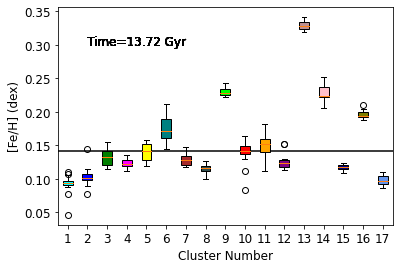

In [3]:
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']   
cluster_count=0
fig1=plt.figure()
#fig1.set_size_inches(7,5)
ax2=fig1.add_subplot(111)
all_fe_each=list()
all_fe=list()
box_colors=dict()
print(box_colors)
for i in range(len(cluster_data_initial)):                              
    
    #ax1=fig1.add_subplot(212)
    
    feh_i=cluster_data_initial[cluster_count+1]["feh_tracked"]
    mgh_i=cluster_data_initial[cluster_count+1]["mgh_tracked"]
    
    feh_l=cluster_data_later[cluster_count+1]["feh_tracked"]
    mgh_l=cluster_data_later[cluster_count+1]["mgh_tracked"]
    list.append(all_fe_each,list(feh_i))
    list.extend(all_fe,list(feh_i))
    plot_name="feh_scatter"+simname+"_cluster_"+str(cluster_count+1)
    x_values=np.ones(len(feh_i))*(cluster_count+1)
    
    #ax2.axhline(y=average,c=colors[i])
    ax2.set_xlabel("Cluster Number",fontsize=12)
    ax2.set_ylabel("[Fe/H] (dex)",fontsize=12)  
    #ax2.set_title("All Clusters")
    ax2.text(2,0.30,"Time=13.72 Gyr",fontsize=12)
    cluster_count+=1
#print(np.array(all_fe))
ax2.axhline(y=np.mean(np.array(all_fe)),c="black")
box=ax2.boxplot(all_fe_each,patch_artist=True)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
fig1.savefig("Fe_H_all_Clusters_Quartiles_Outliers.png")
plt.show()

In [5]:
print(all_fe_each[0])

[0.09803305, 0.099657066, 0.09805354, 0.090079844, 0.07674708, 0.09065386, 0.102873884, 0.095541246, 0.092739224, 0.09322701, 0.094369754, 0.096978724, 0.08908184, 0.09110764, 0.09177971, 0.0944389, 0.09162383, 0.09370109, 0.09675691, 0.09719438, 0.046150547, 0.093003765, 0.09381473, 0.08860129, 0.09847031, 0.095899746, 0.091805704, 0.093604945, 0.09852581, 0.11039131, 0.093162924, 0.09531304, 0.09214049, 0.091099575, 0.09268335, 0.10422319, 0.08834601, 0.0918771, 0.090924256, 0.10520053, 0.10699052, 0.0876083, 0.096028045]


# Mg/H

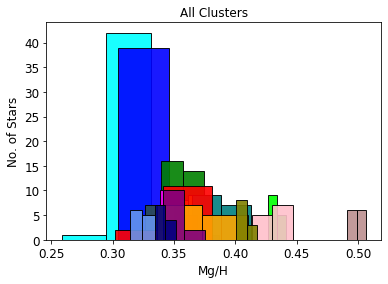

In [85]:
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']   
cluster_count=0
fig1=plt.figure()
#fig1.set_size_inches(7,5)
ax2=fig1.add_subplot(111)
for i in range(len(cluster_data_initial)):                              
    mgh_i=cluster_data_initial[cluster_count+1]["mgh_tracked"]
    mgh_l=cluster_data_later[cluster_count+1]["mgh_tracked"]
    
    plot_name="mgh_histogram"+simname+"_cluster_"+str(cluster_count+1)
    n,bins,edges=ax2.hist(mgh_i,bins=int(len(feh_i)**(1/3)),color=colors[i],ec="black",alpha=0.9)
    ax2.set_xlabel("Mg/H",fontsize=12)
    ax2.set_ylabel("No. of Stars",fontsize=12)  
    ax2.set_title("All Clusters")
    #ax2.set_xticks(bins)
    
    #n,bins,edges=ax1.hist(feh_l,bins=3,color=colors[i],ec="black")
    #ax1.set_xticks(bins)
    
    
    #fig1.savefig(plot_path+plot_name+".png",bbox_inches='tight',dpi=200)
    
    #plt.tight_layout()
    #fig1.clf()
    #break
    cluster_count+=1
plt.show()

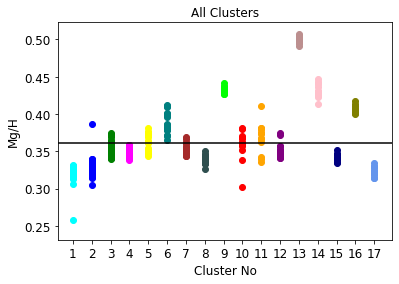

In [40]:
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']   
cluster_count=0
fig1=plt.figure()
#fig1.set_size_inches(7,5)
ax2=fig1.add_subplot(111)
all_mg=list()
for i in range(len(cluster_data_initial)):                              
    
    #ax1=fig1.add_subplot(212)
    
    feh_i=cluster_data_initial[cluster_count+1]["feh_tracked"]
    mgh_i=cluster_data_initial[cluster_count+1]["mgh_tracked"]
    
    feh_l=cluster_data_later[cluster_count+1]["feh_tracked"]
    mgh_l=cluster_data_later[cluster_count+1]["mgh_tracked"]
    list.extend(all_mg,list(mgh_i))
    plot_name="mgh_scatter"+simname+"_cluster_"+str(cluster_count+1)
    x_values=np.ones(len(mgh_i))*(cluster_count+1)
    ax2.scatter(x_values,mgh_i,color=colors[i],label="cluster "+str(cluster_count+1))
    #ax2.axhline(y=average,c=colors[i])
    ax2.set_xlabel("Cluster No",fontsize=12)
    ax2.set_ylabel("Mg/H",fontsize=12)  
    ax2.set_title("All Clusters")
    ax2.set_xticks(np.arange(1,18,1))
    
    cluster_count+=1
#print(all_fe)
ax2.axhline(y=np.mean(np.array(all_mg)),c="black")
plt.show()

In [4]:
!pip install mycolorpy

/bin/bash: pip: command not found
